<a href="https://colab.research.google.com/github/aleesha33/News-Analysis-Using-NLP/blob/main/nlp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/news-data.csv",nrows=2500)

In [ ]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
df.drop(['publish_date'], axis=1, inplace=True)

In [ ]:
df.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
df.isna().sum()

,0
headline_text,0


In [ ]:
headline = df.headline_text
headline

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
2495,suspected al qaeda mastermind arrested in paki...
2496,sydney man swims for a good cause
2497,taipans go out on a high
2498,taiwan tourist train crashes


In [ ]:
headlines=headline.str.replace("[^0-9 a-z A-Z]"," ",regex=True)
headlines

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
2495,suspected al qaeda mastermind arrested in paki...
2496,sydney man swims for a good cause
2497,taipans go out on a high
2498,taiwan tourist train crashes


In [ ]:
import nltk
from nltk.stem import SnowballStemmer

nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

sn=SnowballStemmer("english")

headlines=headlines.apply(lambda x:" ".join([sn.stem(i.lower()) for i in word_tokenize(x)]))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
headlines

,headline_text
0,aba decid against communiti broadcast licenc
1,act fire wit must be awar of defam
2,a g call for infrastructur protect summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travel
...,...
2495,suspect al qaeda mastermind arrest in pakistan
2496,sydney man swim for a good caus
2497,taipan go out on a high
2498,taiwan tourist train crash


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words("english")
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
headlines=headlines.apply(lambda x:" ".join([i for i in x.split() if i not in sw]))
headlines

,headline_text
0,aba decid communiti broadcast licenc
1,act fire wit must awar defam
2,g call infrastructur protect summit
3,air nz staff aust strike pay rise
4,air nz strike affect australian travel
...,...
2495,suspect al qaeda mastermind arrest pakistan
2496,sydney man swim good caus
2497,taipan go high
2498,taiwan tourist train crash


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

x=tfidf.fit_transform(headlines)
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13052 stored elements and shape (2500, 3657)>
  Coords	Values
  (0, 74)	0.47937595548201417
  (0, 920)	0.4554719975064969
  (0, 746)	0.3844924859708327
  (0, 483)	0.4554719975064969
  (0, 1897)	0.4554719975064969
  (1, 103)	0.36943202702004463
  (1, 1285)	0.29671173009519697
  (1, 3595)	0.4357885190854613
  (1, 2154)	0.4074001673289268
  (1, 301)	0.4666425308236093
  (1, 925)	0.4492664525156265
  (2, 546)	0.38747993664323477
  (2, 1678)	0.5939391478971949
  (2, 2540)	0.48736495413255193
  (2, 3163)	0.5094810975664202
  (3, 152)	0.35798969235555506
  (3, 2242)	0.40126931621226275
  (3, 3082)	0.4072204169991318
  (3, 286)	0.3639407931424241
  (3, 3129)	0.3908385763193185
  (3, 2373)	0.37051942985178193
  (3, 2745)	0.3500078662867926
  (4, 152)	0.36011641532428956
  (4, 2242)	0.4036531520870382
  (4, 3129)	0.39316044590125115
  :	:
  (2494, 3138)	0.4233763386531801
  (2494, 2044)	0.5225556276160931
  (2495, 246)	0.3663940827424

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init="k-means++", random_state=1)
km.fit(x)

KMeans(n_clusters=3, random_state=1)

In [ ]:
y_predict=km.predict(x)
y_predict

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [ ]:
centroids = km.cluster_centers_
centroids

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00142578, 0.00039553, 0.00020729, ..., 0.00021876, 0.00268938,
        0.00058235],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01006513,
        0.        ]])

In [ ]:
labels = km.labels_
labels

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y_predict)

np.float64(0.0011281060576558213)

In [ ]:
wcss=[]
for i in range(1,10):
  km=KMeans(n_clusters=i,init="k-means++", random_state=1)
  km.fit(x)
  wcss.append(km.inertia_)

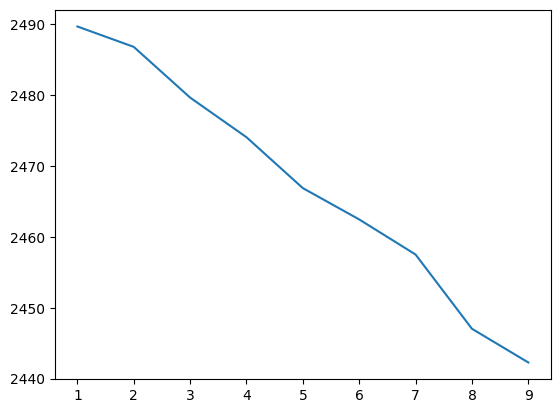

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),wcss)
plt.show()